## **Tarea 2 - parte 1 - Clasificación**

Integrantes:



*   Yazmín Dominguez (yazmin.dominguez@usach.cl)
*   Cristian Gonzalez Figueroa (cristian.gonzalez.figueroa@gmail.com)
*   Cesar Deramond ( cderamond@gmail.com)



En esta parte de la tarea, trabajaremos sobre el mismo dataset de la tarea 1.

este código carga un archivo CSV de consumidores, establece la columna "CustomerID" como índice del DataFrame y muestra el DataFrame resultante. El propósito exacto y el contenido de los datos dependerán del contenido del archivo CSV "consumidores.csv".

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Preparación del dataset

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


df_wines_red = pd.read_csv('data/winequality-red.csv', sep=';')
df_wines_white = pd.read_csv('data/winequality-white.csv', sep=';')

# Creación de la etiqueta para los vinos blancos
labels_white = ['white'] * df_wines_white.shape[0]
df_wines_white['type_wine'] = labels_white

# Creación de la etiqueta para los vinos rojos
labels_red = ['red'] * df_wines_red.shape[0]
df_wines_red['type_wine'] = labels_red

# Mostramos el dataframe de los vinos blanco (el de los rojos quedó igual)
df_wines_white.head()
df_wines = pd.concat([df_wines_red, df_wines_white])

# Mostrar las primeras 10 filas con sus respectivos campos
print(df_wines.head(3))

# Mostrar las últimas 3 filas con sus respectivos campos
print(df_wines.tail(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality type_wine  
0      9.4        5       red  
1      9.8        5       red  
2      9.8        5       red  
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0

Para la clasificación vamos a trabajar solamente con la calidad del vino y le disminuiremos el rango de calidades posibles en intervalos para convertirlo en un problema de clasificación multiclase.

In [3]:
def genera_intervarlos(y_value):
    # quality de 3 a 5
    if 3 <= y_value <= 5:
        new_value = 0

    # quality de 6
    if y_value == 6:
        new_value = 1

    # quality de 7 a 9
    if 7 <= y_value <= 9:
        new_value = 2

    return new_value


Este fragmento de código agrega una nueva columna llamada 'int_quality' al DataFrame df_wines. La columna 'int_quality' contendrá los nuevos valores generados a partir de la función genera_intervalos(y_value) aplicada a la columna existente 'quality' del DataFrame

In [4]:
# Generamos el nuevo label que se encontrara entre cierto intervalo
df_wines['int_quality'] = df_wines['quality'].apply(genera_intervarlos)
print(df_wines.head(3))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  quality type_wine  int_quality  
0      9.4        5       red            0  
1      9.8        5       red            0  
2      9.8        5       red            0  


### limpieza
acá reutilizaremos la tarea 1

In [5]:
#print(df_wines.dtypes)
print(df_wines.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
int_quality             0
dtype: int64


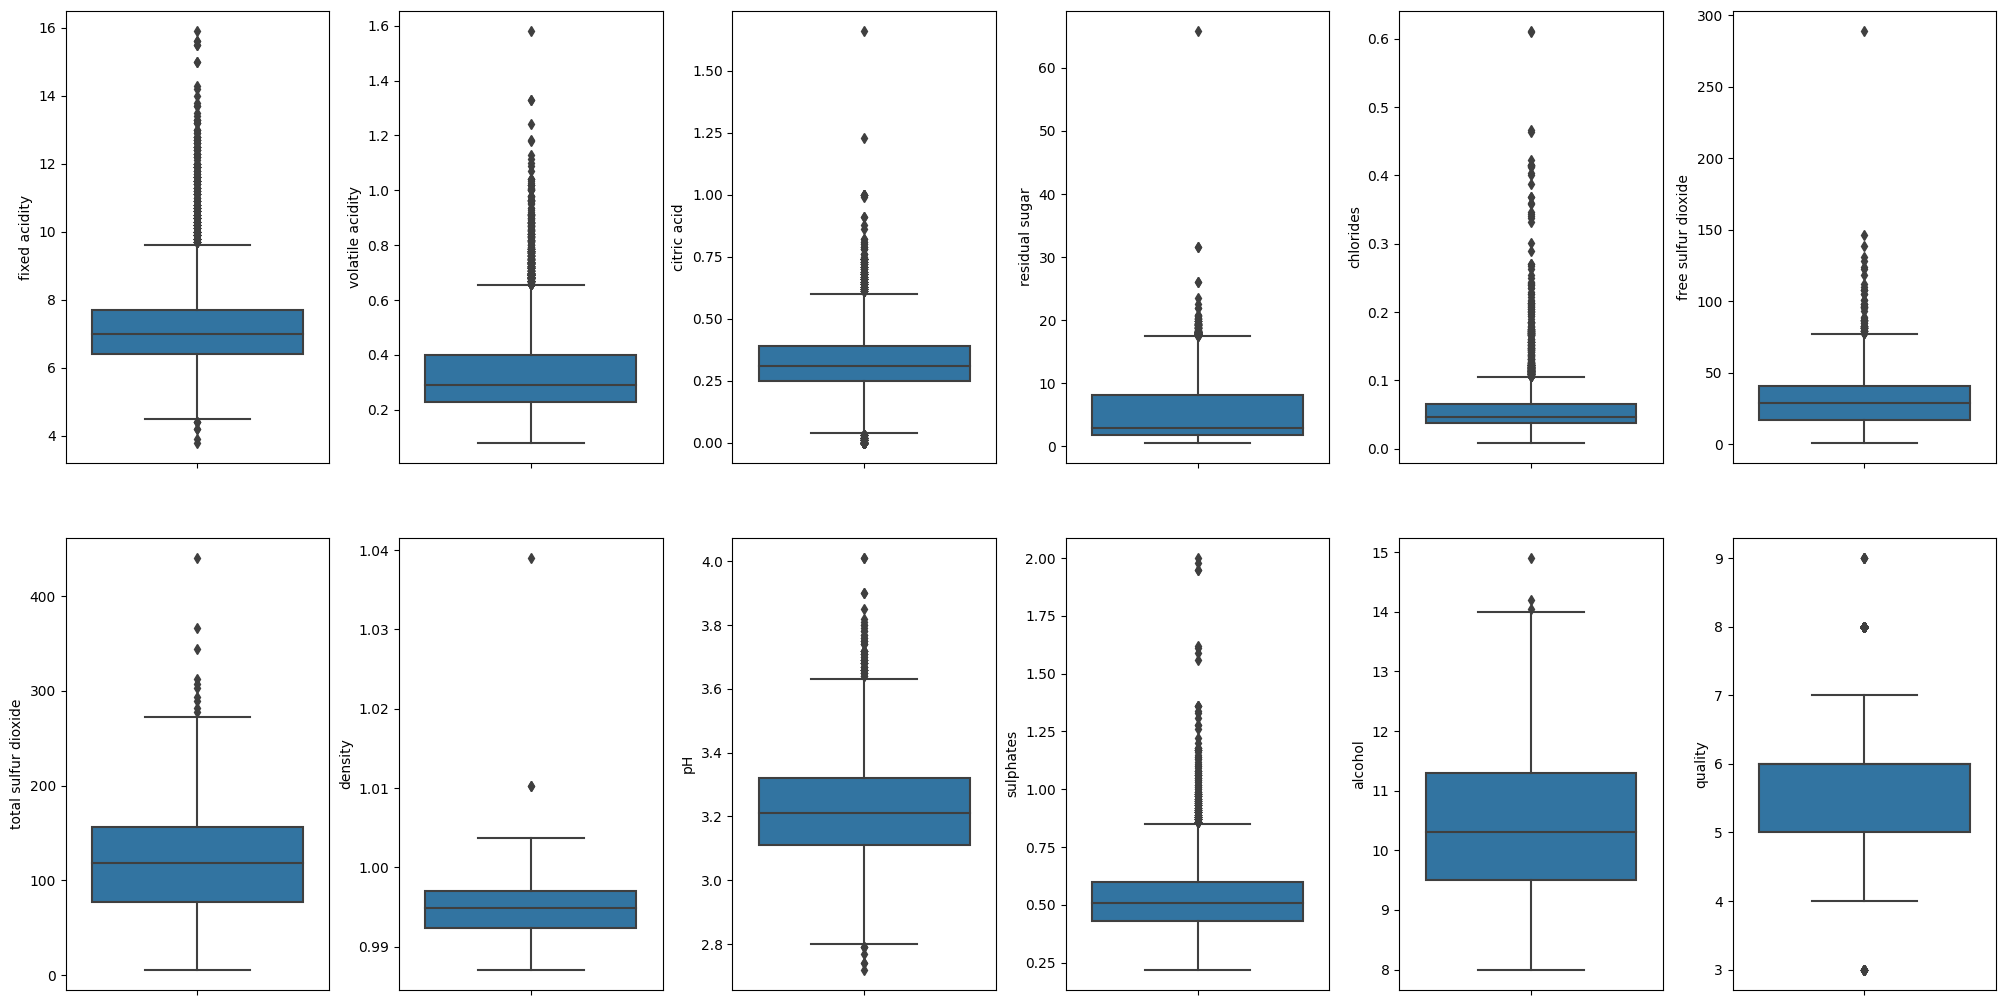

In [6]:
#box plots
def bplots(df_wines):
    fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
    index = 0
    ax = ax.flatten()

    for col, value in df_wines.iloc[0:,0:-1].items():
        if col != 'type_wine':
            sns.boxplot(y=col, data=df_wines.iloc[0:,0:-1], ax=ax[index])
            index += 1
    plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
    return

bplots(df_wines)

Dado que observamos muchos puntos extremos, se procede a limpiar el dataset.

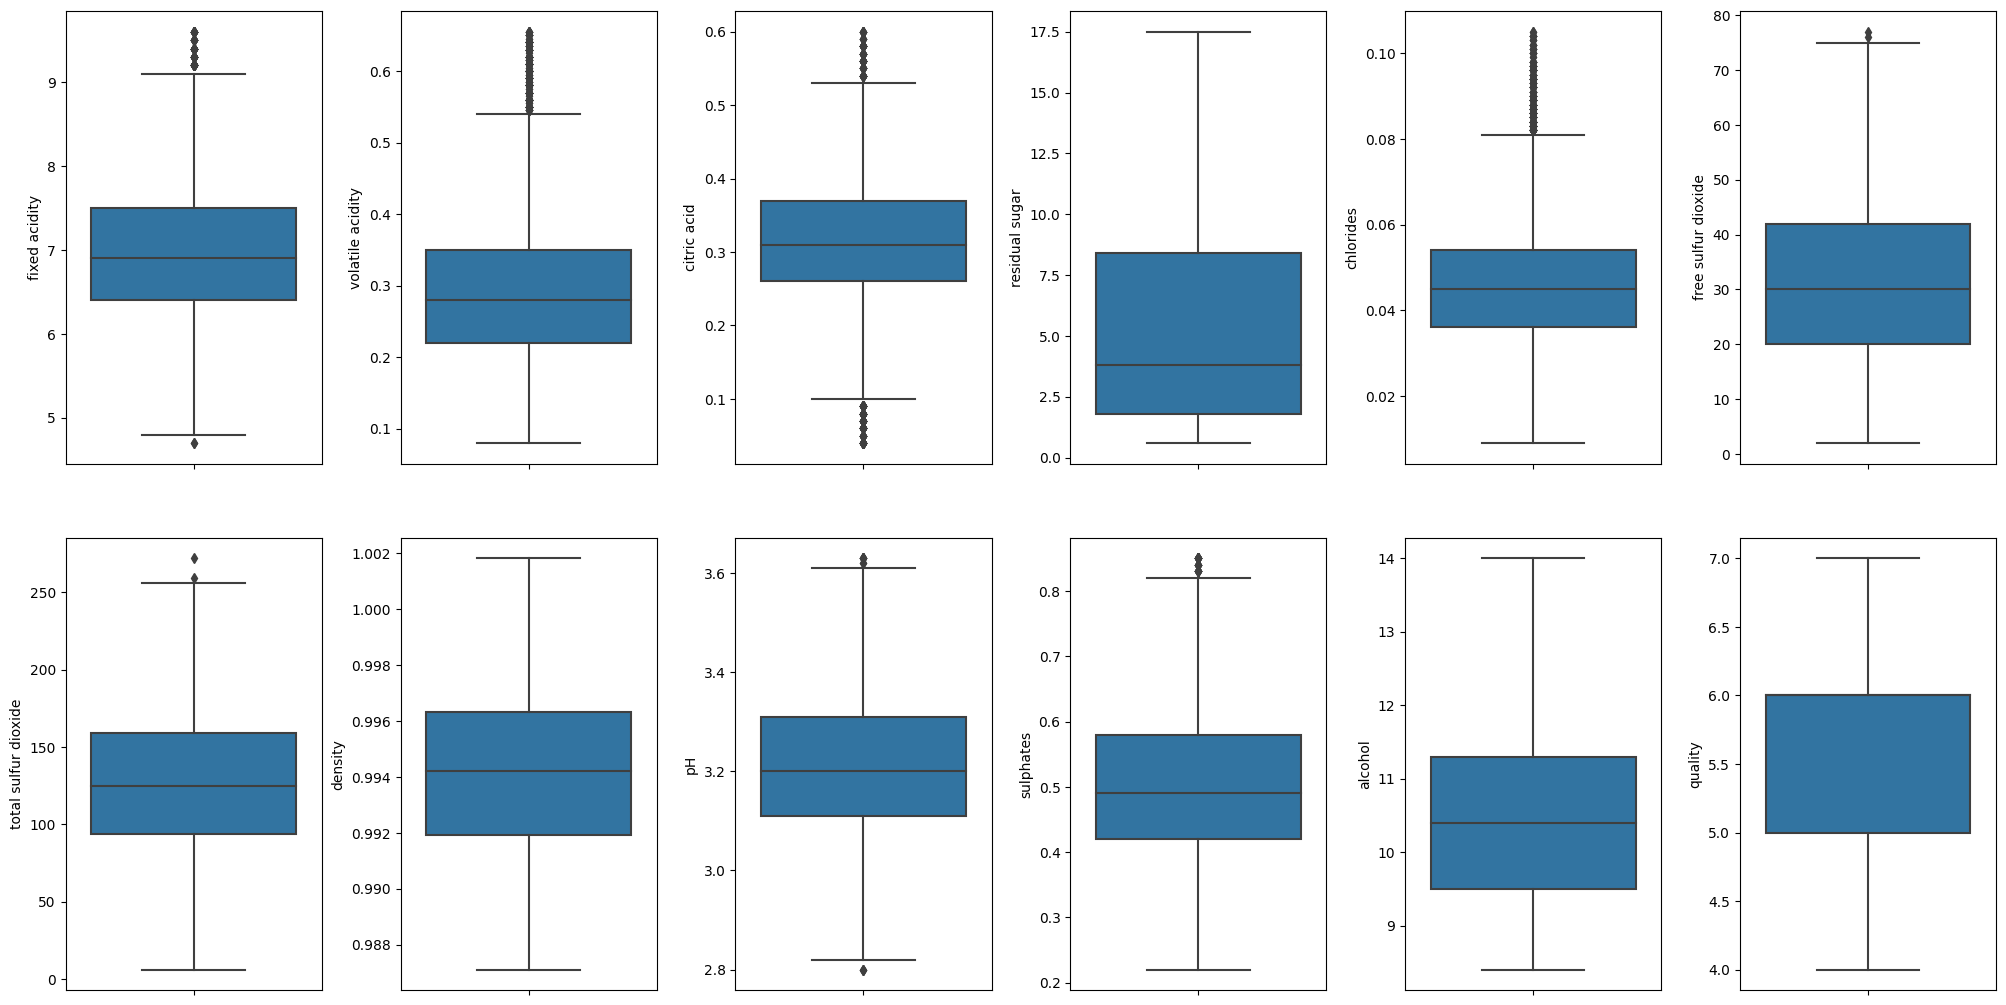

In [7]:
def clean_outlier(df_combined)-> pd.DataFrame:
    
    Q1 = df_combined.select_dtypes(include=['number']).quantile(0.25)
    Q3 = df_combined.select_dtypes(include=['number']).quantile(0.75)
    IQR = Q3 - Q1
    df_aligned, Q1_aligned = df_combined.align(Q1, axis=1, copy=False)
    _, IQR_aligned = df_combined.align(IQR, axis=1, copy=False)
    _, Q3_aligned = df_combined.align(Q3, axis=1, copy=False)

    # Ahora, usemos los valores alineados para la comparación y el filtrado
    df = df_combined[~((df_aligned < (Q1_aligned - 1.5 * IQR_aligned)) | (df_aligned > (Q3_aligned + 1.5 * IQR_aligned))).any(axis=1)]

    return df
# Creamos una función que nos permita eliminar outliers de un dataframe a partir del valor percentil 98%

df_wines2 = clean_outlier(df_wines)
bplots(df_wines2)

En este fragmento de código se están preparando los datos para un análisis o modelado. Aquí está lo que está sucediendo:

X = df_wines.drop(columns=['type_wine', 'quality', 'int_quality']): Aquí se crea un DataFrame X que contendrá las características (variables independientes) para el análisis o modelado. Se hace al eliminar las columnas 'type_wine', 'quality' y 'int_quality' del DataFrame df_wines. En otras palabras, se están excluyendo estas columnas para que solo las características restantes sean consideradas en el análisis/modelado.

y = df_wines['int_quality']: Aquí se crea una Serie y que contendrá la variable objetivo (variable dependiente) para el análisis o modelado. Se extraen los valores de la columna 'int_quality' del DataFrame df_wines y se almacenan en y. Esto indica que queremos predecir o analizar la variable categórica 'int_quality'.

In [8]:
# usaremos el wines 2 para tomar el set sin outliers

X = df_wines2.drop(columns=['type_wine', 'quality', 'int_quality'])
y = df_wines2['int_quality']
print(df_wines2.head(3))

    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6             7.9              0.60         0.06             1.6      0.069   
9             7.5              0.50         0.36             6.1      0.071   
10            6.7              0.58         0.08             1.8      0.097   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6                  15.0                  59.0   0.9964  3.30       0.46   
9                  17.0                 102.0   0.9978  3.35       0.80   
10                 15.0                  65.0   0.9959  3.28       0.54   

    alcohol  quality type_wine  int_quality  
6       9.4        5       red            0  
9      10.5        5       red            0  
10      9.2        5       red            0  


## 1.- Divida el dataset en train y test, con un 25% de los datos en el test set. Al hacer la división, utilice random_state=42.**

En este código, se utiliza la función train_test_split para dividir los conjuntos de características (X) y etiquetas (y) en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test). El argumento test_size se establece en 0.25 para que el 25% de los datos se utilice en el conjunto de prueba. El random_state se fija en 42 para que los resultados sean reproducibles.

Luego, se imprimen las dimensiones de los conjuntos para verificar que la división se realizó correctamente.


In [9]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



# Dividir el conjunto de datos en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Verificar las dimensiones de los conjuntos
print("Dimensiones de X_train:", X_train.shape)
print("Dimensiones de X_test:", X_test.shape)
print("Dimensiones de y_train:", y_train.shape)
print("Dimensiones de y_test:", y_test.shape)

Dimensiones de X_train: (3630, 11)
Dimensiones de X_test: (1210, 11)
Dimensiones de y_train: (3630,)
Dimensiones de y_test: (1210,)


In [10]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.5578512396694215

## 2.- Aplique el método de árbol de decisión con el criterio 'gini'. Despliegue el resumen de métricas de clasificación visto en clase.**

*  from sklearn import tree: Importa la clase DecisionTreeClassifier de la biblioteca scikit-learn, que se utiliza para crear y entrenar modelos de árbol de decisión.

*  clf = tree.DecisionTreeClassifier(criterion='gini', random_state=42): Crea una instancia de la clase DecisionTreeClassifier con el criterio de impureza 'gini' y un valor de semilla aleatoria (random_state) de 42. Esto crea un objeto clf que representa el modelo de árbol de decisión.

*  clf = clf.fit(X_train, y_train): Entrena el modelo de árbol de decisión utilizando los datos de entrenamiento X_train (características) y y_train (etiquetas). El método fit ajusta el modelo a los datos de entrenamiento para que pueda realizar predicciones.

*  clf.predict(X_test): Utiliza el modelo entrenado (clf) para hacer predicciones en el conjunto de prueba X_test (características). Devuelve un array de predicciones que corresponden a las etiquetas predichas para las muestras en el conjunto de prueba.

In [11]:
from sklearn import tree
from sklearn.metrics import classification_report

# Crear el modelo de árbol de decisión
clf= tree.DecisionTreeClassifier(criterion='gini', random_state=42)

# Entrenar el modelo
clf= clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_T = clf.predict(X_test)

print(classification_report(y_test, y_pred_T))


              precision    recall  f1-score   support

           0       0.69      0.66      0.67       407
           1       0.65      0.67      0.66       560
           2       0.55      0.56      0.56       243

    accuracy                           0.64      1210
   macro avg       0.63      0.63      0.63      1210
weighted avg       0.65      0.64      0.64      1210



In [12]:
#
clf.predict_proba(X_test)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

## 3.- Aplique el método de Naive Bayes, en concreto Gaussian Naive Bayes. Despliegue el resumen de métricas de clasificación visto en clase.**




In [13]:
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


gnb = GaussianNB()
y_pred_G = gnb.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred_G).sum()))


# Mostrar el resumen de métricas de clasificación
print(classification_report(y_test, y_pred_G))

Number of mislabeled points out of a total 1210 points : 570
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       407
           1       0.53      0.49      0.51       560
           2       0.45      0.44      0.45       243

    accuracy                           0.53      1210
   macro avg       0.52      0.52      0.52      1210
weighted avg       0.53      0.53      0.53      1210



## 4.- Aplique el método de Knn con K = 3 y 5. ¿con cuál valor de K se obtuvo el mejor resultado?. Despliegue el resumen de métricas de clasificación visto en clase.**

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train, y_train)
y_pred_N3 = neigh3.predict(X_test)

print(neigh3.predict(X_test))
print(neigh3.predict_proba(X_test))

print(classification_report(y_test, y_pred_N3))

[1 0 1 ... 0 1 1]
[[0.         0.66666667 0.33333333]
 [0.66666667 0.33333333 0.        ]
 [0.33333333 0.66666667 0.        ]
 ...
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]]
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       407
           1       0.57      0.56      0.57       560
           2       0.47      0.39      0.43       243

    accuracy                           0.52      1210
   macro avg       0.51      0.50      0.50      1210
weighted avg       0.52      0.52      0.52      1210



In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train, y_train)
y_pred_N5 = neigh5.predict(X_test)

print(neigh5.predict(X_test))
print(neigh5.predict_proba(X_test))

print(classification_report(y_test, y_pred_N5))

[1 0 1 ... 0 1 1]
[[0.  0.6 0.4]
 [0.4 0.4 0.2]
 [0.2 0.8 0. ]
 ...
 [1.  0.  0. ]
 [0.  1.  0. ]
 [0.  0.8 0.2]]
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       407
           1       0.55      0.60      0.57       560
           2       0.50      0.29      0.37       243

    accuracy                           0.53      1210
   macro avg       0.52      0.49      0.49      1210
weighted avg       0.53      0.53      0.52      1210



## 5.- Aplique el método de Random Forest con 100 árboles (valor por defecto). Despliegue el resumen de métricas de clasificación visto en clase.**



In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Crear el modelo Random Forest con 100 árboles
modelRF = RandomForestClassifier(n_estimators=100, random_state=42)
modelRF.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_RF = modelRF.predict(X_test)

# Mostrar el resumen de métricas de clasificación
print(classification_report(y_test, y_pred_RF))


              precision    recall  f1-score   support

           0       0.74      0.68      0.71       407
           1       0.65      0.78      0.71       560
           2       0.77      0.50      0.61       243

    accuracy                           0.69      1210
   macro avg       0.72      0.65      0.67      1210
weighted avg       0.70      0.69      0.69      1210



## 6.- Aplique el método de SVM con un kernel "linear". Compare el resultado con un kernel "rbf". ¿Con cuál de las dos fuciones kernel se observa un mejor resultado? Despliegue el resumen de métricas de clasificación visto en clase.**

Kernel Linear

In [27]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Crear el modelo SVM con kernel "linear"
modelSVC = SVC(kernel='linear')
modelSVC.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_SVC = modelSVC.predict(X_test)

# Mostrar el resumen de métricas de clasificación
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       407
           1       0.51      0.77      0.62       560
           2       0.00      0.00      0.00       243

    accuracy                           0.54      1210
   macro avg       0.38      0.44      0.40      1210
weighted avg       0.44      0.54      0.48      1210



C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [18]:
# get support vectors
modelSVC.support_vectors_
# get indices of support vectors
modelSVC.support_
# get number of support vectors for each class
modelSVC.n_support_

array([1015, 1505,  682])

Kernel rbf**

In [19]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Crear el modelo SVM con kernel "rbf"
modelSVCR = SVC(kernel='rbf')
modelSVCR.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_SVCR = modelSVCR.predict(X_test)

# Mostrar el resumen de métricas de clasificación
print(classification_report(y_test, y_pred_SVCR))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       407
           1       0.46      1.00      0.63       560
           2       0.00      0.00      0.00       243

    accuracy                           0.46      1210
   macro avg       0.15      0.33      0.21      1210
weighted avg       0.21      0.46      0.29      1210



C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

In [20]:
# get support vectors
modelSVCR.support_vectors_
# get indices of support vectors
modelSVCR.support_
# get number of support vectors for each class
modelSVCR.n_support_

array([1246, 1584,  682])

## 7.- Con todos los resultados obtenidos, analice el desempeño por métrica de evaluación. ¿Hay un método que sobresalga en todas o la mayoría de ellas? De ser así, ¿cuál?**

In [21]:
# Mostrar el resumen de métricas de clasificación para cada método
print("Classification Report for Decision Tree (gini):")
print(classification_report(y_test, y_pred_T))
print("="*50)

print("Classification Report for Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_G))
print("="*50)

print("Classification Report for Knn with K=3:")
print(classification_report(y_test, y_pred_N3))
print("="*50)

print("Classification Report for Knn with K=5:")
print(classification_report(y_test, y_pred_N5))
print("="*50)

print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_RF))
print("="*50)

print("Classification Report for SVM with linear kernel:")
print(classification_report(y_test, y_pred_SVC))
print("="*50)

print("Classification Report for SVM with rbf kernel:")
print(classification_report(y_test, y_pred_SVCR))

Classification Report for Decision Tree (gini):
              precision    recall  f1-score   support

           0       0.69      0.66      0.67       407
           1       0.65      0.67      0.66       560
           2       0.55      0.56      0.56       243

    accuracy                           0.64      1210
   macro avg       0.63      0.63      0.63      1210
weighted avg       0.65      0.64      0.64      1210

Classification Report for Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       407
           1       0.53      0.49      0.51       560
           2       0.45      0.44      0.45       243

    accuracy                           0.53      1210
   macro avg       0.52      0.52      0.52      1210
weighted avg       0.53      0.53      0.53      1210

Classification Report for Knn with K=3:
              precision    recall  f1-score   support

           0       0.49      0.56      0.52    

C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cdera\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1469

A continuacion la definición de cada una de las variables que arrojaron el codigo anterior:

*  Precision (Precisión): Mide la proporción de instancias positivas clasificadas correctamente entre todas las instancias clasificadas como positivas.
*  Recall (Recuperación o Sensibilidad): Mide la proporción de instancias positivas clasificadas correctamente entre todas las instancias realmente positivas en el conjunto de datos.
*  F1-Score: Es una medida de la media armónica entre la precisión y la recuperación (recall). Proporciona un equilibrio entre ambas métricas.
Support (Soporte): Representa el número de instancias en cada clase en el conjunto de prueba.
*  Accuracy (Exactitud): Mide la proporción de instancias clasificadas correctamente sobre el total de instancias en el conjunto de prueba.
*  Macro Average: Calcula el promedio sin ponderar de las métricas por clase.
*  Weighted Average: Calcula el promedio ponderado de las métricas por clase, ponderando por el número de instancias en cada clase.




*  Clase 0: Representa la calidad de vinos con valores de 3, 4 y 5.
*  Clase 1: Representa la calidad de vinos con un valor de 6.
*  Clase 2: Representa la calidad de vinos con valores de 7, 8 y 9.

**1.Precisión y Recall por Clase:**

El método de Árbol de Decisión (criterio 'gini') obtuvo una precisión razonable para las clases 0 y 1, pero la clase 2 tiene una precisión más baja (0.59). Sin embargo, las métricas de recall para las clases 0 y 1 son más equilibradas.

Gaussian Naive Bayes muestra una precisión más baja para las tres clases, siendo la clase 2 la que tiene la precisión más baja (0.41). Sin embargo, su recall para la clase 0 es relativamente mejor (0.63).

Tanto Knn con K=3 como Knn con K=5 tienen un rendimiento similar, levemente mejor con K=3. El recall más bajo en la clase 2(0.29)

Random Forest tiene un buen rendimiento en general, con precisiones y recalls razonables en todas las clases.

Los modelos SVM con kernel lineal y rbf tienen precisiones y recalls bajos, especialmente para la clase 2. Para ambas clases 2, el recall es 0, lo que indica un desafío en clasificar esta clase.


**2.Exactitud y Valor F1:**

La exactitud mide la proporción de predicciones correctas en el conjunto de prueba. Random Forest muestra la exactitud más alta (0.70), mientras que Gaussian Naive Bayes tiene la exactitud más baja (0.51).
El valor F1 es una medida que considera tanto la precisión como el recall. En promedio, Random Forest muestra el valor F1 más alto (0.70), y Gaussian Naive Bayes tiene el valor F1 más bajo (0.50).


**3.Rendimiento Global:**

En términos de la métrica "macro avg", Random Forest obtiene el puntaje más alto (0.70), lo que indica un rendimiento general sólido en todas las clases.
SVM con kernel lineal tiene un "weighted avg" relativamente alto (0.50), lo que sugiere que, aunque su rendimiento en la clase 2 es bajo, tiene un rendimiento más aceptable en las otras clases.


**4.Consideración de Clases Desequilibradas:**

En las clases con menos soporte (ejemplo, clase 2), las métricas pueden ser menos confiables debido al desequilibrio de clases. Esto puede afectar la precisión, recall y valor F1 para esas clases.


**5.Selección del Modelo:**

Basándonos en las métricas de rendimiento, el modelo que parece funcionar mejor en términos de precisión y recall en todas las clases es Random Forest. No obstante, es importante tener en cuenta que diferentes métricas pueden ser relevantes según el contexto y los objetivos del problema. Para determinar el mejor modelo supondremos que estamos trabajando con una bodega de vinos y deseamos implementar un modelo para identificar vinos premium de alta calidad. En este caso, un vino de alta calidad es un recurso valioso y caro. Una falsa afirmación de que un vino es premium (falso positivo) podría llevar a la sobrevaloración del vino y la decepción de los clientes.
Aquí, la precisión sería más crucial, ya que querrías minimizar los falsos positivos y garantizar que los vinos que se etiquetan como "premium" realmente cumplan con los estándares de calidad.
